In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.Geography.value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [5]:
df.Gender.value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [6]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
from sklearn.preprocessing import LabelEncoder
df['Gender']=LabelEncoder().fit_transform(df['Gender'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [22]:
geography_onehot_data = pd.get_dummies(df['Geography'])
df = pd.concat([df,geography_onehot_data],axis=1)
df.drop(['Geography'],axis=1,inplace=True)
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,France,Germany,Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


<AxesSubplot:>

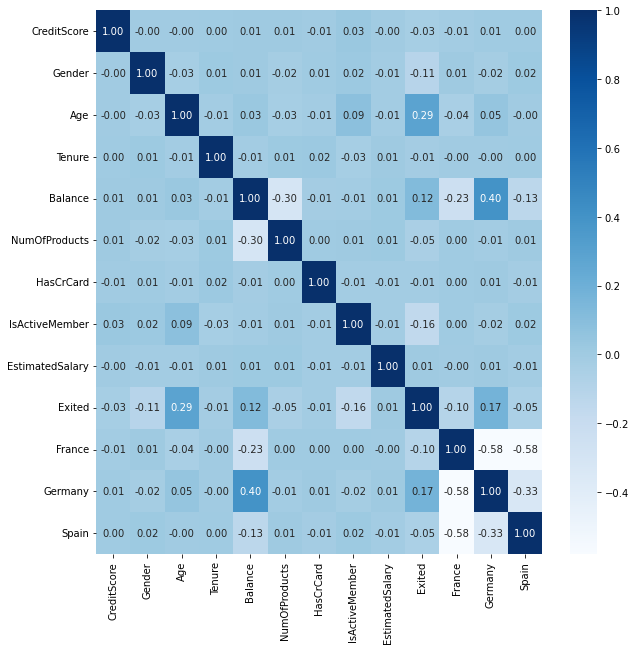

In [50]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='Blues')

In [61]:
#spliting into tranin and test data
X=df.drop('Exited',axis=1)
y=df['Exited']

In [62]:
#splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=25)

In [63]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
print("Accuracy score of Logistic Regression is:",accuracy_score(y_test,y_pred))

Accuracy score of Logistic Regression is: 0.8


In [66]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=26)
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.869


In [70]:
# gradiant boosting
from sklearn.ensemble import GradientBoostingClassifier
gc1 = GradientBoostingClassifier()
gc1.fit(X_train, y_train)
y_pred = gc1.predict(X_test)
print("Accuracy of Gradiant Bossting Classifier w/o Standarization:",accuracy_score(y_test, y_pred))

Accuracy of Gradiant Bossting Classifier w/o Standarization: 0.872


In [67]:
#standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr=LogisticRegression()
lr.fit(X_train_scaled,y_train)
y_pred=lr.predict(X_test_scaled)
print("Accuracy score of Logistic Regression is:",accuracy_score(y_test,y_pred))

Accuracy score of Logistic Regression is: 0.81


In [72]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=26)
rf.fit(X_train_scaled,y_train)
y_pred=rf.predict(X_test_scaled)
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 0.8695


In [73]:
# gradiant boosting
from sklearn.ensemble import GradientBoostingClassifier
gc1 = GradientBoostingClassifier()
gc1.fit(X_train_scaled, y_train)
y_pred = gc1.predict(X_test_scaled)
print("Accuracy of Gradiant Bossting Classifier w/o Standarization:",accuracy_score(y_test, y_pred))

Accuracy of Gradiant Bossting Classifier w/o Standarization: 0.872
